In [1]:
import numpy as np
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras

2022-11-22 00:10:47.302485: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

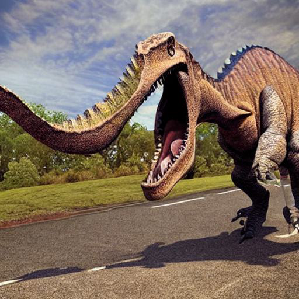

In [3]:
dino_image = load_img("./train/dino/008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg", target_size=(299, 299))
dino_image

In [4]:
dragon_image = load_img("./train/dragon/011689fa-0178-4721-bcb0-6e63c6814a98.jpg", target_size=(299, 299))
dragon_image.size

(299, 299)

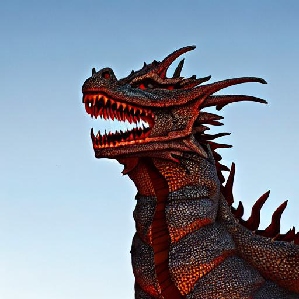

In [5]:
dragon_image

In [6]:
np.array(dragon_image).shape

(299, 299, 3)

### Prepare data

In [7]:
train_gen = ImageDataGenerator(rescale=1./255)

In [8]:
train_ds = train_gen.flow_from_directory("./train", target_size=(150, 150), batch_size=20, shuffle=True, class_mode='binary')

Found 1594 images belonging to 2 classes.


In [9]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [10]:
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
test_ds = test_gen.flow_from_directory("./test", target_size=(150, 150), batch_size=20, shuffle=True, class_mode='binary')

Found 394 images belonging to 2 classes.


### Create and train model

In [12]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [13]:
input_shape = (150, 150, 3)
inputs = keras.Input(shape=input_shape)
conv_layer = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    input_shape=input_shape,
    activation='relu'
)
pooling_layer = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
dense_layer = Dense(64, activation='relu')
output_layer = Dense(1, activation='sigmoid')


In [14]:
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()
model.add(inputs)
model.add(conv_layer)
model.add(pooling_layer)
model.add(flatten_layer)
model.add(dense_layer)
model.add(output_layer)
model.summary()

2022-11-22 00:10:49.303045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

2022-11-22 00:10:49.310039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 00:10:49.310684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 00:10:49.311738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 00:10:49.312074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [16]:
learning_rate = 0.002
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [17]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [18]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2022-11-22 00:10:51.553595: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-22 00:10:52.230613: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 00:10:52.231145: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 00:10:52.231185: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-22 00:10:52.231690: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 00:10:52.231769: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 113ms/step - loss: 0.6609 - accuracy: 0.5822 - val_loss: 0.5772 - val_accuracy: 0.7944
Epoch 2/10
80/80 [==============================] - 9s 109ms/step - loss: 0.5220 - accuracy: 0.7792 - val_loss: 0.5421 - val_accuracy: 0.6599
Epoch 3/10
80/80 [==============================] - 9s 110ms/step - loss: 0.4410 - accuracy: 0.8036 - val_loss: 0.3916 - val_accuracy: 0.8604
Epoch 4/10
80/80 [==============================] - 9s 109ms/step - loss: 0.4054 - accuracy: 0.8225 - val_loss: 0.3988 - val_accuracy: 0.8452
Epoch 5/10
80/80 [==============================] - 9s 110ms/step - loss: 0.3327 - accuracy: 0.8651 - val_loss: 0.3278 - val_accuracy: 0.8629
Epoch 6/10
80/80 [==============================] - 9s 108ms/step - loss: 0.2924 - accuracy: 0.8864 - val_loss: 0.3253 - val_accuracy: 0.8629
Epoch 7/10
80/80 [==============================] - 9s 109ms/step - loss: 0.2650 - accuracy: 0.8946 - val_loss: 0.3099 - val_accuracy: 0.8731
Epoch 8/10
80/80

In [24]:
model.history.